In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

from utilities import visualize_classifier

In [2]:
# Load input data
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [3]:
# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

Text(0.5, 1.0, 'Input data')

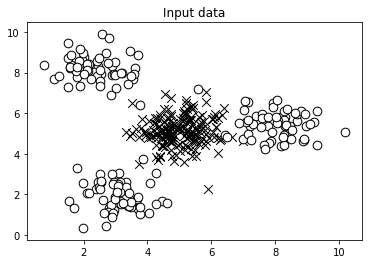

In [4]:
# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

In [5]:
# Split data into training and testing datasets
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [6]:
# Decision Trees classifier
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
# visualize_classifier(classifier, X_train, y_train, 'Training dataset')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
y_test_pred = classifier.predict(X_test)
# visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [8]:
# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
target_names=class_names))
print("#"*40 + "\n")
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")
plt.show()


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################

